In [1]:
!pip install herbie-data xarray cartopy matplotlib metpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.4/424.4 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 71.4 MB/s eta 0:00:00


In [2]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ INFO: Created a default config file.                 │
 │ You may view/edit Herbie's configuration here:       │
 │          /root/.config/herbie/config.toml            │
 ╰──────────────────────────────────────────────────────╯



In [3]:
H = Herbie(
    "2025-07-30",
    model="hrrr",
    product="prs",
    fxx=6,
)
myFile = H.download(verbose=True)
print(myFile)

✅ Found ┊ model=hrrr ┊ product=prs ┊ 2025-Jul-30 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/root/data/hrrr/20250730]
✅ Success! Downloaded HRRR from aws                 
	src: https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20250730/conus/hrrr.t00z.wrfprsf06.grib2
	dst: /root/data/hrrr/20250730/hrrr.t00z.wrfprsf06.grib2
/root/data/hrrr/20250730/hrrr.t00z.wrfprsf06.grib2


In [4]:
# Show available products
H.PRODUCTS

{'sfc': '2D surface level fields; 3-km resolution',
 'prs': '3D pressure level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [26]:
# find available products with key words
H.inventory(searchString='10 m')

/tmp/ipython-input-2936296161.py:2: DeprecationWarning: The argument `searchString` was renamed `search`. Please update your scripts.
  H.inventory(searchString='10 m')


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
621,622,330026257,332407871.0,330026257-332407871,2025-07-30,2025-07-30 06:00:00,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
622,623,332407872,334789486.0,332407872-334789486,2025-07-30,2025-07-30 06:00:00,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst
623,624,334789487,336041808.0,334789487-336041808,2025-07-30,2025-07-30 06:00:00,WIND,10 m above ground,5-6 hour max fcst,:WIND:10 m above ground:5-6 hour max fcst
624,625,336041809,337459627.0,336041809-337459627,2025-07-30,2025-07-30 06:00:00,MAXUW,10 m above ground,5-6 hour max fcst,:MAXUW:10 m above ground:5-6 hour max fcst
625,626,337459628,338833850.0,337459628-338833850,2025-07-30,2025-07-30 06:00:00,MAXVW,10 m above ground,5-6 hour max fcst,:MAXVW:10 m above ground:5-6 hour max fcst


In [6]:
#ds = H.xarray("TMP:700 mb")
#t700 = ds.t-273.15
#print(t700)

In [44]:
# temperature at 850 hPa
ds = H.xarray("TMP:850 mb") # Temperature at 850 mb
t850 = ds.t - 273.15 # Convert to Celsius

ds_hgt_850 = H.xarray("HGT:850 mb") # Geopotential height at 850 mb
hgt = ds_hgt_850.gh

ds_ugrd_850 = H.xarray("UGRD:850 mb")
u850 = ds_ugrd_850.u # eastward wind (m/s)

ds_vgrd_850 = H.xarray("VGRD:850 mb")
v850 = ds_vgrd_850.v # northward wind (m/s)

# For 10m wind speed, we need UGRD and VGRD at 10m
ds_ugrd_10m = H.xarray("UGRD:10 m")
u10m = ds_ugrd_10m['u10'] # Access using dictionary-style with correct variable name 'u10'

ds_vgrd_10m = H.xarray("VGRD:10 m")
v10m = ds_vgrd_10m['v10'] # Access using dictionary-style with correct variable name 'v10'

wind10 = np.sqrt(u10m**2 + v10m**2) # Calculate 10m wind speed

print(f"Wind speed stats: min={wind10.min().item():.2f} m/s, max={wind10.max().item():.2f} m/s")

Wind speed stats: min=0.03 m/s, max=20.35 m/s


In [35]:
# -----------------------------
# 4. Compute wind speed & direction
# -----------------------------
wind_speed = np.sqrt(u850**2 + v850**2)
wind_dir = (270 - np.rad2deg(np.arctan2(v850, u850))) % 360  # meteorological convention

print(f"Wind speed stats: min={wind_speed.min().item():.2f} m/s, max={wind_speed.max().item():.2f} m/s")

Wind speed stats: min=0.03 m/s, max=23.83 m/s


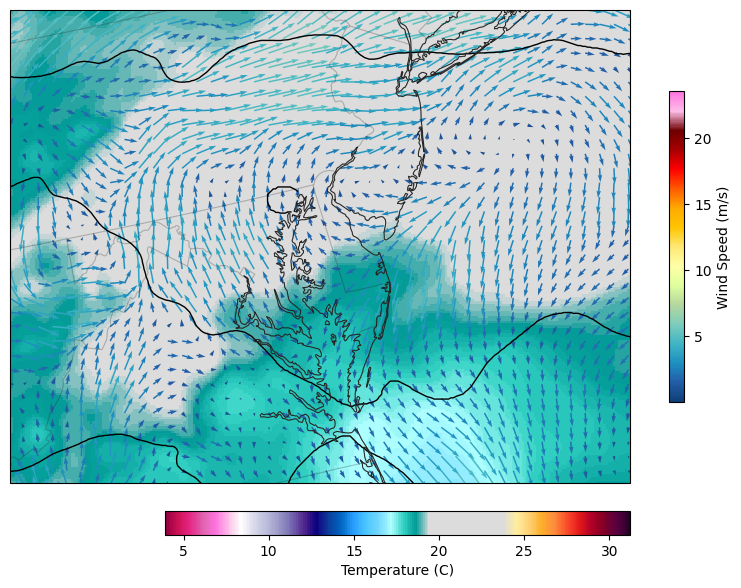

Text(0.0, 1.0, 'hrrr: 3D pressure level fields; 3-km resolution\nValid: 06:00 UTC 30 Jul 2025')

In [51]:
#plot temperature
ax = EasyMap("10m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax
#ax = plt.axes(projection=ccrs.LambertConformal())

ax.set_extent([-80, -72, 37, 41], crs=ccrs.PlateCarree())
p = ax.pcolormesh(ds.longitude, ds.latitude, t850, cmap="nws.heat_index", transform=pc)
#p = ax.pcolormesh(
#    ds.longitude,
#    ds.latitude,
#    t850,
#    transform=pc,
#    **paint.NWSTemperature.kwargs2,
#)
plt.colorbar(p, ax=ax, orientation="horizontal",label="Temperature (C)", pad=0.01, shrink=0.6)
    #p,
    #ax=ax,
    #orientation="horizontal",
    #pad=0.01,
    #shrink=0.8,
    #**paint.NWSTemperature.cbar_kwargs2,
#)

# Plot Height contours
levels = np.arange(np.floor(hgt.min()), np.ceil(hgt.max()), 5)
#print(levels)
cs = ax.contour(
    hgt["longitude"], hgt["latitude"], hgt,
    levels=levels, colors="black", linewidths=1,
    transform=ccrs.PlateCarree()
)
ax.clabel(cs, inline=True, inline_spacing=1, fontsize=8, fmt="%.0f")

# Subsample for plotting clarity
skip = 6
lon = ds.longitude.values
lat = ds.latitude.values
q = ax.quiver( # Store the result of quiver in 'q'
    lon[::skip, ::skip],
    lat[::skip, ::skip],
    u850.values[::skip, ::skip],
    v850.values[::skip, ::skip],
    wind_speed.values[::skip, ::skip],
    scale=100,
    cmap="nws.wind",
    transform=ccrs.PlateCarree()
)
# Pass 'q' as the mappable for the wind speed colorbar
plt.colorbar(q, ax=ax, orientation="vertical", label="Wind Speed (m/s)", shrink=0.6)
plt.show()

ax.set_title(
    f"{ds.model.lower()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
#ax.set_title(hgt.GRIB_name, loc="right")

In [12]:
ds = H.xarray("MSLMA:mean sea level") # Mean Sea Level Pressure
mslp = ds.mslma/100.
#print(mslp)

[1005.   1005.25 1005.5  1005.75 1006.   1006.25 1006.5  1006.75 1007.
 1007.25 1007.5  1007.75 1008.   1008.25 1008.5  1008.75 1009.   1009.25
 1009.5  1009.75 1010.   1010.25 1010.5  1010.75 1011.   1011.25 1011.5
 1011.75 1012.   1012.25 1012.5  1012.75 1013.   1013.25 1013.5  1013.75
 1014.   1014.25 1014.5  1014.75 1015.   1015.25 1015.5  1015.75 1016.
 1016.25 1016.5  1016.75 1017.   1017.25 1017.5  1017.75 1018.   1018.25
 1018.5  1018.75 1019.   1019.25 1019.5  1019.75 1020.   1020.25 1020.5
 1020.75 1021.   1021.25 1021.5  1021.75 1022.   1022.25 1022.5  1022.75
 1023.   1023.25 1023.5  1023.75 1024.   1024.25 1024.5  1024.75 1025.
 1025.25 1025.5  1025.75 1026.   1026.25 1026.5  1026.75]


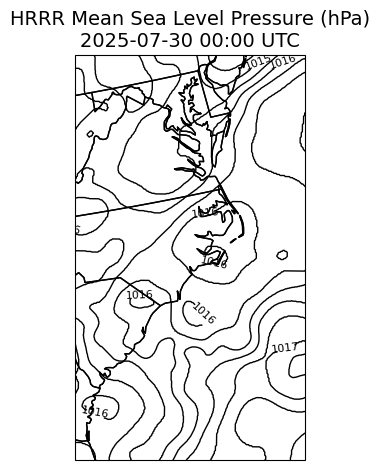

Text(1.0, 1.0, 'MSLP (MAPS System Reduction)')

In [13]:
#ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 8]).BORDERS().STATES().ax
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-80, -75, 30, 40], crs=ccrs.PlateCarree())

#Add map features
ax.add_feature(cfeature.COASTLINE.with_scale("50m"))
ax.add_feature(cfeature.BORDERS.with_scale("50m"))
ax.add_feature(cfeature.STATES.with_scale("50m"))

levels = np.arange(np.floor(mslp.min()), np.ceil(mslp.max()), 0.25)
print(levels)
cs = ax.contour(
    mslp["longitude"], mslp["latitude"], mslp,
    levels=levels, colors="black", linewidths=1,
    transform=ccrs.PlateCarree()
)
ax.clabel(cs, inline=True, fontsize=8, fmt="%.0f")

plt.title(f"HRRR Mean Sea Level Pressure (hPa)\n{H.date:%Y-%m-%d %H:%M UTC}", fontsize=14)
plt.tight_layout()
plt.show()

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.mslma.GRIB_name, loc="right")